### **FACE SWAPPING USING OPENCV**

Installing required packages

In [1]:
# pip install cmake

In [ ]:
# pip install dlib

Importing Required Libraries

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import dlib
import matplotlib.pyplot as plt

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the Images

In [ ]:
# Reading Image 1- Source Image
source_image = cv2.imread("a.jpg")
source_image = cv2.resize(source_image,(256,256))
source_image_gray = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)

# Reading Image 2- Destination Image
dest_image = cv2.imread("b.jpg")
dest_image = cv2.resize(dest_image,(256,256))
dest_image_gray = cv2.cvtColor(dest_image, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(source_image_gray)

Input Images

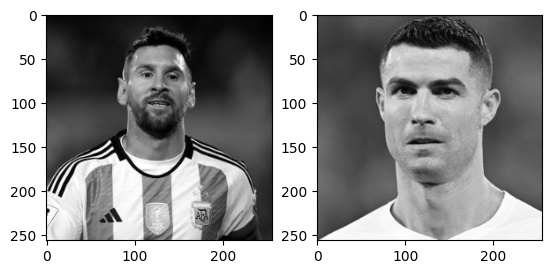

In [ ]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(source_image_gray,cmap = "gray")
axarr[1].imshow(dest_image_gray,cmap = "gray")

Input Images

Importing Pre defined Face detectors from dlib library

In [ ]:
land_detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")

Finding Landmark points and Finding the Convexhull of the Source Image

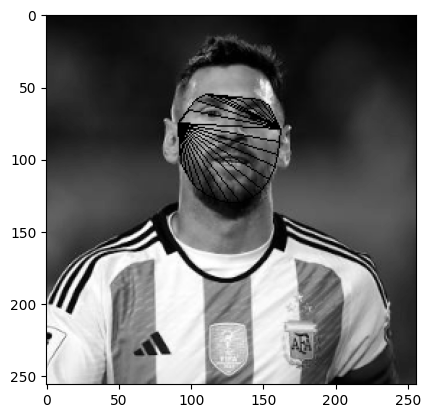

In [ ]:
source_face = land_detector(source_image_gray)
for face in source_face:
    landmarks = predictor(source_image_gray, face)
    points = []
    for n in range(0, 68):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      points.append((x, y))

      # Converting all data points into an numpy array
      face_point = np.array(points, np.int32)

      # Finding Convex hull of the image
      convexhull = cv2.convexHull(face_point)

      # Plotting the convexhull on the image
      cv2.drawContours(source_image_gray, [convexhull], 0, (0,0,0), 1)

plt.imshow(source_image_gray,cmap="gray")
# cv2_imshow(source_image_gray)

Finding Landmark points and Finding the Convexhull of the Destination Image

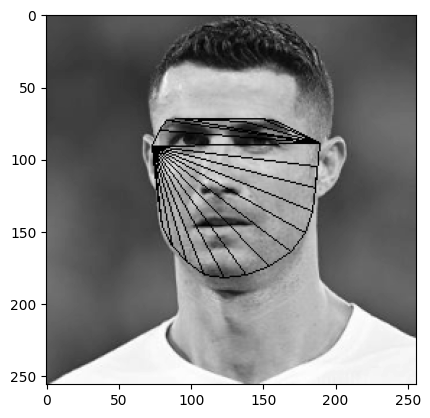

In [ ]:
dest_face = land_detector(dest_image_gray)
for face in dest_face:
    landmarks = predictor(dest_image_gray, face)
    points2 = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        points2.append((x, y))

        # Converting all data points into an numpy array
        face_point2 = np.array(points2, np.int32)

        # Finding Convex hull of the image
        convexhull2 = cv2.convexHull(face_point2)

        # Plotting the convexhull on the image
        cv2.drawContours(dest_image_gray, [convexhull2], 0, (0,0,0), 1)
plt.imshow(dest_image_gray,cmap="gray")
# cv2_imshow(dest_image_gray)

Capturing the Face from Source Image

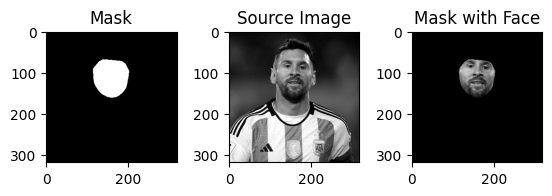

In [ ]:
# Reading Source Image Again
source_image2 = cv2.imread("a.jpg")
source_image_gray2 = cv2.cvtColor(source_image2, cv2.COLOR_BGR2GRAY)

# Building Mask
mask = np.zeros_like(source_image_gray2)

# Finding Face Coordinates
faces = land_detector(source_image_gray2)
for face in faces:
  points_predict1 = predictor(source_image_gray2, face)
  points_list = []
  for n in range(0, 68):
    x = points_predict1.part(n).x
    y = points_predict1.part(n).y
    points_list.append((x, y))

  # Converting all data points into an numpy array
  face_point = np.array(points_list, np.int32)

  # Finding Convex hull of the image
  convexhull = cv2.convexHull(face_point)

  # Adding the Face part (Convex hull of the image) over the mask image created
  a = cv2.fillConvexPoly(mask, convexhull, 255)

# cv2_imshow(mask)
face_image_1 = cv2.bitwise_and(source_image_gray2, source_image_gray2, mask=mask)
plt.subplot(1,3,1)

plt.imshow(a,cmap="gray")
plt.title("Mask")
plt.subplot(1,3,2)
plt.imshow(source_image_gray2,cmap="gray")
plt.title("Source Image")
plt.subplot(1,3,3)
plt.imshow(face_image_1,cmap="gray")
plt.title("Mask with Face")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Triangulation of Source Image (Delaunay Triangulation)

Rect:  (114, 69, 88, 93)


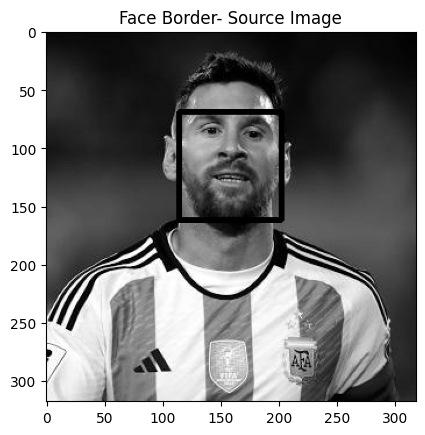

In [ ]:
rect = cv2.boundingRect(convexhull)
x,y,w,h = cv2.boundingRect(convexhull)
cv2.rectangle(source_image_gray2,(x,y),(x+w,y+h),(0,0,0),3)
plt.imshow(source_image_gray2,cmap="gray")
plt.title("Face Border- Source Image")
print("Rect: ",rect)
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(points_list)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

Finding Index of datapoints in Face_point list

In [ ]:
def index_nparray(nparray):
  index = None
  for num in nparray[0]:
    index = num
    break
  return index

Mapping of Source Image with Destination Image

[[22, 27, 21], [27, 22, 42], [2, 0, 1], [52, 62, 51], [62, 52, 63], [1, 0, 36], [31, 29, 30], [29, 31, 40], [2, 1, 31], [62, 66, 67], [66, 62, 65], [3, 2, 48], [48, 4, 3], [4, 48, 5], [9, 57, 56], [57, 9, 8], [48, 31, 49], [31, 48, 2], [6, 5, 59], [32, 30, 33], [30, 32, 31], [7, 6, 59], [35, 30, 47], [30, 35, 34], [8, 7, 57], [10, 9, 56], [31, 1, 41], [11, 10, 55], [47, 29, 42], [29, 47, 30], [12, 11, 54], [40, 37, 38], [37, 40, 41], [13, 12, 54], [37, 20, 38], [20, 37, 19], [14, 13, 54], [29, 40, 39], [15, 14, 35], [19, 37, 18], [16, 15, 45], [36, 0, 17], [0, 18, 17], [18, 37, 36], [18, 36, 17], [20, 23, 22], [27, 42, 28], [20, 22, 21], [43, 47, 42], [47, 43, 44], [20, 21, 38], [43, 23, 24], [23, 43, 22], [26, 16, 45], [16, 26, 25], [43, 24, 44], [24, 25, 44], [42, 22, 43], [25, 26, 45], [21, 27, 39], [1, 36, 41], [27, 28, 39], [53, 35, 14], [35, 53, 52], [28, 29, 39], [29, 28, 42], [33, 30, 34], [49, 32, 50], [32, 49, 31], [62, 67, 61], [58, 7, 59], [7, 58, 57], [50, 32, 33], [52, 33

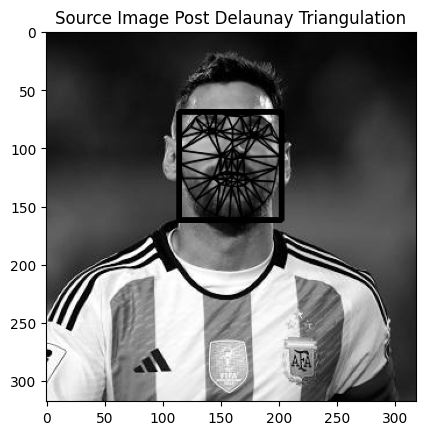

In [ ]:
triangles_id = []
delaunay_source_display = source_image_gray2.copy()
for t in triangles:

  # Getting Edge Points of Each Triangle from Source Image
  pt1 = (t[0], t[1])
  pt2 = (t[2], t[3])
  pt3 = (t[4], t[5])

  # Finding index of each points in Face_point list
  id_pt1 = np.where((face_point == pt1).all(axis=1))
  id_pt1 = index_nparray(id_pt1)
  # print("ID_PT1",id_pt1)

  id_pt2 = np.where((face_point == pt2).all(axis=1))
  id_pt2 = index_nparray(id_pt2)
  # print("ID_PT2",id_pt2)

  id_pt3 = np.where((face_point == pt3).all(axis=1))
  id_pt3 = index_nparray(id_pt3)
  # print("ID_PT3",id_pt3)

  if id_pt1 is not None and id_pt2 is not None and id_pt3 is not None:
    triangle = [id_pt1, id_pt2, id_pt3]
    triangles_id.append(triangle)

    # Plotiing trianglulations on source image (copy)
    cv2.line(delaunay_source_display, pt1, pt2, 0, 1, cv2.LINE_AA)
    cv2.line(delaunay_source_display, pt2, pt3, 0, 1, cv2.LINE_AA)
    cv2.line(delaunay_source_display, pt3, pt1, 0, 1, cv2.LINE_AA)

# cv2_imshow(source_image_gray2)
plt.imshow(delaunay_source_display,cmap="gray")
plt.title("Source Image Post Delaunay Triangulation")
print(triangles_id)

Capturing Face Section From Destination Image Again

In [ ]:
dest_image2 = cv2.imread("b.jpg")
dest_image_gray2 = cv2.cvtColor(dest_image2, cv2.COLOR_BGR2GRAY)
faces2 = land_detector(dest_image_gray2)
for face in faces2:
  points_predict2 = predictor(dest_image_gray2, face)
  points_list2 = []
  for n in range(0, 68):
    x = points_predict2.part(n).x
    y = points_predict2.part(n).y
    points_list2.append((x, y))
  face_point2 = np.array(points_list2, np.int32)
  convexhull2 = cv2.convexHull(face_point2)

Swapping Destination Image Face with Source Image Face

Text(0.5, 1.0, 'Source Face in Destination Image Mask')

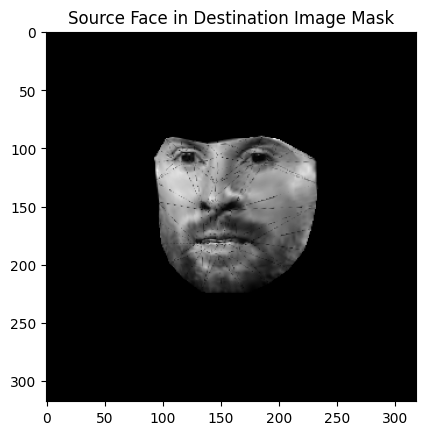

In [ ]:
dest_new_face = np.zeros_like(dest_image_gray2, np.uint8)
for triangle_index in triangles_id:

    # Obtaining and applying mask over triangles from Source Image

    # Obtaining Triangle points from points_list list
    tr1_pt1 = points_list[triangle_index[0]]
    tr1_pt2 = points_list[triangle_index[1]]
    tr1_pt3 = points_list[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    rect1 = cv2.boundingRect(triangle1)
    (x1, y1, w1, h1) = rect1
    cropped_triangle = source_image_gray2[y1: y1 + h1, x1: x1 + w1]
    cropped_tr1_mask = np.zeros((h1, w1), np.uint8)
    points = np.array([[tr1_pt1[0] - x1, tr1_pt1[1] - y1],
                      [tr1_pt2[0] - x1, tr1_pt2[1] - y1],
                      [tr1_pt3[0] - x1, tr1_pt3[1] - y1]], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle, mask=cropped_tr1_mask)

    # Obtaining and applying mask over triangles from destination image
    tr2_pt1 = points_list2[triangle_index[0]]
    tr2_pt2 = points_list2[triangle_index[1]]
    tr2_pt3 = points_list2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2 = cv2.boundingRect(triangle2)
    (x2, y2, w2, h2) = rect2
    cropped_triangle2 = dest_image_gray2[y2: y2 + h2, x2: x2 + w2]
    cropped_tr2_mask = np.zeros((h2, w2), np.uint8)
    points2 = np.array([[tr2_pt1[0] - x2, tr2_pt1[1] - y2],
                       [tr2_pt2[0] - x2, tr2_pt2[1] - y2],
                       [tr2_pt3[0] - x2, tr2_pt3[1] - y2]], np.int32)
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2, mask=cropped_tr2_mask)

    # converting points into float
    points = np.float32(points)
    points2 = np.float32(points2)

    M = cv2.getAffineTransform(points, points2)

    # Converting triangles from source image to shape/size of its corresponding triangle in destination image
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w2, h2))

    # Thinning border lines of the triangles from image
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

    # Getting Edges for the area where each triangle from Source Image is to be placed in Destination Image
    dest_new_face_rect_area = dest_new_face[y2: y2 + h2, x2: x2 + w2]

    # Thinning border lines of the triangles from image
    _, mask_triangles_designed = cv2.threshold(dest_new_face_rect_area, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    # Placing each source triangle over the mask image in the coordinates of the destination image
    dest_new_face_rect_area = cv2.add(dest_new_face_rect_area, warped_triangle)
    dest_new_face[y2: y2 + h2, x2: x2 + w2] = dest_new_face_rect_area

plt.imshow(dest_new_face,cmap="gray")
plt.title("Source Face in Destination Image Mask")

In [ ]:
dest_face_mask = np.zeros_like(dest_image_gray2)

Text(0.5, 1.0, 'Face Mask')

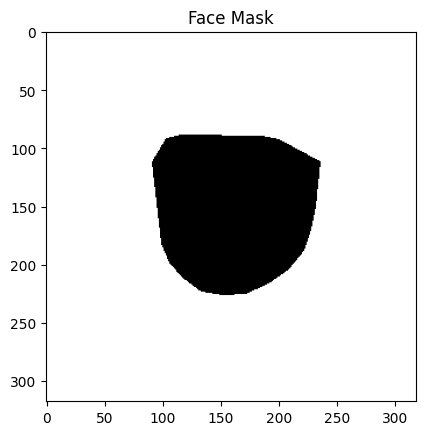

In [ ]:
dest_face_mask = np.zeros_like(dest_image_gray2)
dest_head_mask = cv2.fillConvexPoly(dest_face_mask, convexhull2, (255,255,255))
dest_face_mask = cv2.bitwise_not(dest_head_mask)
plt.imshow(dest_face_mask,cmap="gray")
plt.title("Face Mask")

Text(0.5, 1.0, 'Destination Image post Face removal')

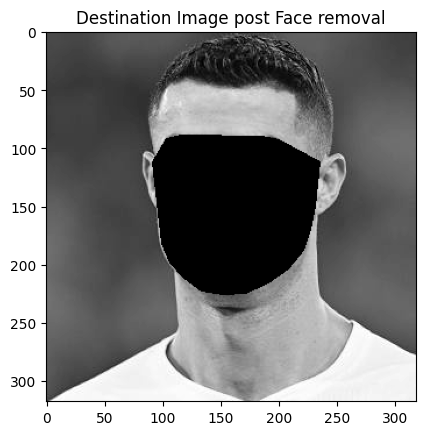

In [ ]:
dest_noface = cv2.bitwise_and(dest_image_gray2, dest_image_gray2, mask=dest_face_mask)
plt.imshow(dest_noface,cmap="gray")
plt.title("Destination Image post Face removal")

Text(0.5, 1.0, 'Resulting Swapped Image')

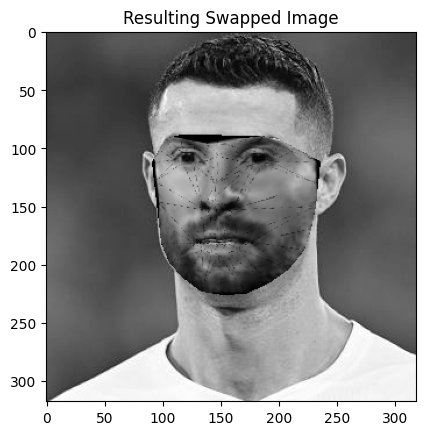

In [ ]:
result = cv2.add(dest_noface, dest_new_face)
plt.imshow(result,cmap="gray")
plt.title("Resulting Swapped Image")

Text(0.5, 1.0, 'Final Swapped Image')

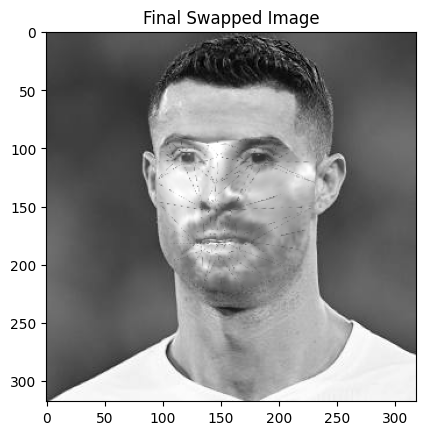

In [ ]:
(x3, y3, w3, h3) = cv2.boundingRect(convexhull2)
# finding coordinates of the merged face section on image
center_face = (int((x3 + x3 + w3) / 2), int((y3 + y3 + h3) / 2))

# print(dest_image_gray2.shape)
dest_image_gray2 = np.squeeze(np.stack((dest_image_gray2,) * 3, -1))
# print(dest_image_gray2.shape)

# performing seamless cloning
seamlessclone = cv2.seamlessClone(result, dest_image_gray2, dest_head_mask, center_face, cv2.NORMAL_CLONE)
plt.imshow(seamlessclone,cmap="gray")
plt.title("Final Swapped Image")